<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/main/2348513_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/employee_data (1) 2.csv')

In [ ]:
df.head

<bound method NDFrame.head of        avg_monthly_hrs   department  filed_complaint  last_evaluation  \
0                  221  engineering              NaN         0.932868   
1                  232      support              NaN              NaN   
2                  184        sales              NaN         0.788830   
3                  206        sales              NaN         0.575688   
4                  249        sales              NaN         0.845217   
...                ...          ...              ...              ...   
14244              178           IT              NaN         0.735865   
14245              257        sales              NaN         0.638604   
14246              232      finance              1.0         0.847623   
14247              130           IT              NaN         0.757184   
14248              159          NaN              NaN         0.578742   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  
0             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [ ]:
df=df.drop('recently_promoted',axis=1)
df=df.drop('filed_complaint',axis=1)

In [ ]:
df= df.fillna(method='ffill')

In [ ]:
df.isnull().sum()

avg_monthly_hrs    0
department         0
last_evaluation    0
n_projects         0
salary             0
satisfaction       0
status             0
tenure             0
dtype: int64

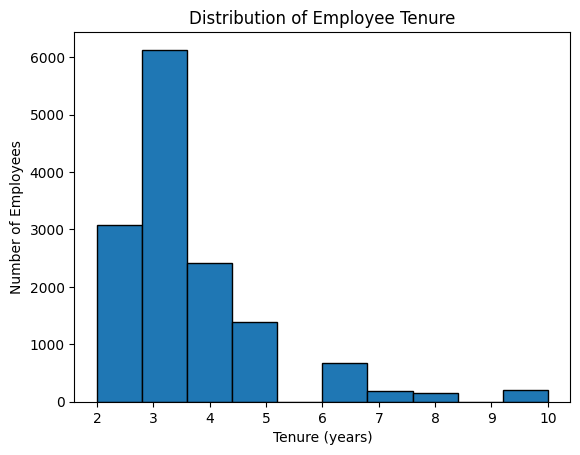

In [ ]:
plt.hist(df['tenure'], bins=10, edgecolor='k')
plt.xlabel('Tenure (years)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Tenure')
plt.show()


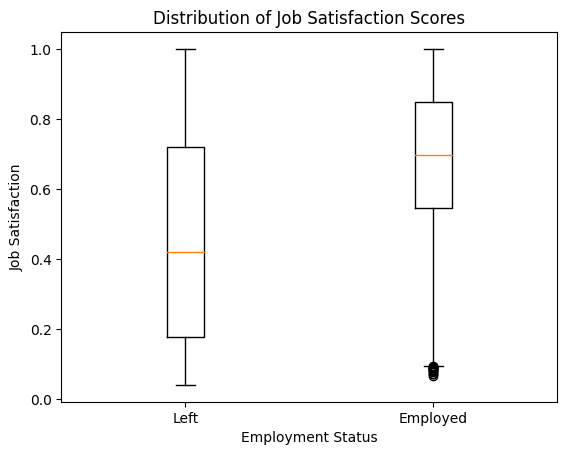

In [ ]:
plt.boxplot([df[df['status'] == 'Left']['satisfaction'], df[df['status'] == 'Employed']['satisfaction']])
plt.xticks([1, 2], ['Left', 'Employed'])
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction')
plt.title('Distribution of Job Satisfaction Scores')
plt.show()